# Pandas

[Pandas](https://pandas.pydata.org/) es una librería que incluye estructuras de datos y herramientas de análisis.
Sus principales estructuras de datos son Series y DataFrame.

Pandas dispone de una funcionalidad muy amplia que no podemos cubrir en este tutorial por lo que os recomendamos consultar su excelente [documentación](https://pandas.pydata.org/pandas-docs/stable/tutorials.html).

## Series

[Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) es un array unidimensional construido sobre un array de Numpy.
La principal dieferencia entre una Series y un array de Numpy se debe a que la primera incluye un índice que podemos utilizar para etiquetar los elementos de la serie.


In [2]:
import pandas

s = pandas.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s['b']

2

Series tiene un comportamiento muy similar al de un array de Numpy por lo que puede utilizarse en la mayoría de funciones que esperan un array.

In [2]:
import numpy

numpy.max(s)

4

Se puede acceder al array de Numpy que almacena los datos utilizando la propiedad values.

In [55]:
s.values

array([1, 2, 3, 4])

![pandas vs numpy](../imagenes/numpy_vs_pandas.png)

## DataFrame

[DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html) es una tabla bidimensional con etiquetas.
Cuando creamos un DataFrame, además de los datos, podemos especificar el índice para las filas y los nombres de las columnas.

En un DataFrame puede tener tipos heterogéneos, cada columna se comporta como una serie y puede albergar columnas de distintos tipos.


Se puede pensar en un DataFrame como en un diccionario cuyos valores son series.

In [4]:
df = pandas.DataFrame([[1, 2.1], [3, 4.0], [5, 6.2]], ['A', 'B', 'C'], ['col1', 'col2'])
df

,col1,col2
A,1,2.1
B,3,4.0
C,5,6.2


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, A to C
Data columns (total 2 columns):
col1    3 non-null int64
col2    3 non-null float64
dtypes: float64(1), int64(1)
memory usage: 72.0+ bytes


In [5]:
df['col1']

A    1
B    3
C    5
Name: col1, dtype: int64

In [6]:
df['col2']

A    2.1
B    4.0
C    6.2
Name: col2, dtype: float64

Pandas tiene otro tipo de dato para trabajar con matrices multidimensionales: [Panel](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Panel.html).

## Leyendo datos

Pandas tiene un gran soporte para leer datos desde múltiples fuentes.

Podemos leer datos desde ficheros tabulares [CSV](https://es.wikipedia.org/wiki/Valores_separados_por_comas).

In [3]:
iris = pandas.read_csv('../datos_ejemplo/iris.csv', delimiter=',')
iris.iloc[:5, :]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Seleccionando columnas y filas

### Columnas

Podemos referirnos a una columna concreta por su nombre y obtendremos la serie correspondiente.

In [3]:
iris['sepal_length'][:5]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

También podemos pedir una lista de columnas.

In [4]:
iris[['sepal_width', 'sepal_length']][:5]

,sepal_width,sepal_length
0,3.5,5.1
1,3.0,4.9
2,3.2,4.7
3,3.1,4.6
4,3.6,5.0


### Indexando por posición o por índice: loc e iloc

Dado que las tablas de pandas tienen etiquetas en filas (index) y columnas (nombres de las columnas) podemos utilizar estas etiquetas para obtener datos, pero si lo deseamos también podemos indexar basándonos en las posiciones de las filas y las columnas.

Una forma clara de distinguir ambos indexados es utilizar [iloc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html) y [loc](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html).
loc espera etiquetas de índices de filas y columnas e iloc espera posiciones.
Hay que tener en cuenta de que loc e iloc, cuando reciben como índice una tupla con dos elementos, esperan primero el índice para la fila y luego el de la columna.

In [5]:
iris.iloc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

In [6]:
iris.iloc[:5, 0]

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal_length, dtype: float64

In [7]:
iris.loc[0]

sepal_length       5.1
sepal_width        3.5
petal_length       1.4
petal_width        0.2
species         setosa
Name: 0, dtype: object

### Seleccionando mediante máscaras

De forma análoga a como lo hacíamos en Numpy en Pandas también podemos crear máscaras binarias y utilizarlas para indexar.

In [8]:
mascara = iris['sepal_length'] >= 3.9
iris[mascara]

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Tablas dinámicas, agrupando filas

Podemos agrupar filas y obtener estadísticas basándolse en el valor de una fila concreta utilizando el método [groupby](http://pandas.pydata.org/pandas-docs/stable/groupby.html).

In [9]:
iris.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.418  ...        1.575  1.9        50.0  0.244   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.107210  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

Podemos aplicar funciones a estos agregados, por ejemplo, podemos pedir que haga la media de los valores por especie.

In [11]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


## Gráficos

Pandas permite hacer una exploración gráfica de los datos de un modo muy sencillo.

Podemos dibujar los valores de una columa.

<AxesSubplot:>

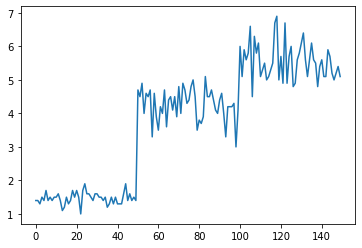

In [12]:
%matplotlib inline

iris['petal_length'].plot()

También podemos hacer un histograma.

<AxesSubplot:>

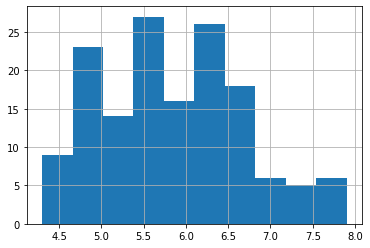

In [13]:
iris['sepal_length'].hist()

Utilizando los agregados podemos hacer los histogramas por especie.

species
setosa        AxesSubplot(0.125,0.125;0.775x0.755)
versicolor    AxesSubplot(0.125,0.125;0.775x0.755)
virginica     AxesSubplot(0.125,0.125;0.775x0.755)
Name: sepal_length, dtype: object

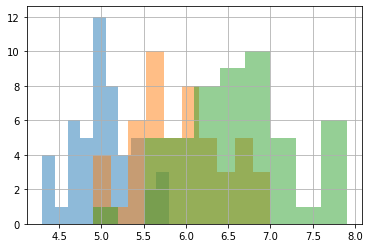

In [14]:
iris.groupby('species')['sepal_length'].hist(alpha=0.5)